In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
raw_data_path=os.path.join('data','raw')
df=pd.read_csv(os.path.join(raw_data_path,'fer2013.csv'))
X=[]
for i in range(len(df)):
    X.append(df.loc[i,'pixels'].split(' '))
X=np.array(X,np.float32)/255.
y=df.emotion.values
X_train=X[np.where(df.Usage=='Training')]
y_train=y[np.where((df.Usage=='Training'))]
X_test=X[np.where((df.Usage!='Training'))]
y_test=y[np.where((df.Usage!='Training'))]
def balance_classes(X,y):
    X1=X[np.where(y!=1)]
    X2=X[np.where(y==1)]
    X2=np.repeat(X2,9,axis=0)
    X=np.concatenate((X1,X2),axis=0)
    y1=y[np.where(y!=1)]
    y2=y[np.where(y==1)]
    y2=np.repeat(y2,9,axis=0)
    y=np.concatenate((y1,y2),axis=0)
    i=[i for i in range(len(y))]
    np.random.shuffle(i)
    return X[i],y[i]
X_train,y_train=balance_classes(X_train,y_train)
def one_hot_encoder(X):
    N=len(X)
    K=len(set(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
y_train=one_hot_encoder(y_train)

In [34]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    W=np.random.randn(D,K)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        W=W-lr*(X_t.T.dot(dy))
        b=b-lr*(dy).sum(axis=0)
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 5.357790485155568 , Classification: 0.16944473202885046 , Test Cost 5.185511456996907 , Classification : 0.17080745341614906
Epoch 100 Train Cost: 1.516110240850131 , Classification: 0.1552955792525106 , Test Cost 1.4831417679993444 , Classification : 0.15807453416149067
Epoch 200 Train Cost: 1.313367439555524 , Classification: 0.16050660868965042 , Test Cost 1.2819792590620742 , Classification : 0.16304347826086957
Epoch 300 Train Cost: 1.1986990110219855 , Classification: 0.16285329744279947 , Test Cost 1.1689278253713367 , Classification : 0.16645962732919253
Epoch 400 Train Cost: 1.1193528609453565 , Classification: 0.16985885357352382 , Test Cost 1.0910666677137573 , Classification : 0.1720496894409938
Epoch 500 Train Cost: 1.0589059926352098 , Classification: 0.17431066017876246 , Test Cost 1.0321983516161548 , Classification : 0.17453416149068324
Epoch 600 Train Cost: 1.0106747414592043 , Classification: 0.1796252200020706 , Test Cost 0.9854759645301648 , Cla

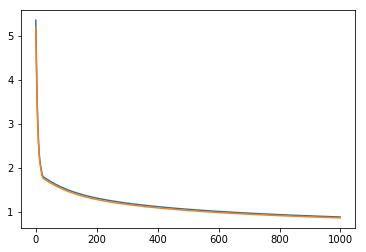

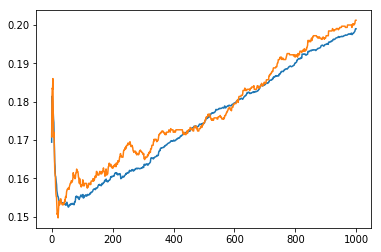

Wall time: 11min 54s


In [35]:
%%time
fit(X_train,y_train,0.000001,1000)

## Stochastic GD

In [38]:
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    W=np.random.randn(D,K)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    for i in range(epoch):
        for n in range(len(X_t)):
            x=X_t[n,:].reshape(1,D)
            Y=y_t[n,:].reshape(1,K)
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            W=W-lr*(x.T.dot(dy))
            b=b-lr*(dy).sum(axis=0)
            c_t.append(cost(Y,y_p_t))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            c_v.append(cost(y_v,y_p_v))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 1==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()

Epoch 0 Train Cost: 9.243904927980362 , Classification: 0.0 , Test Cost 5.591397213452602 , Classification : 0.13478260869565217
Epoch 1 Train Cost: 5.900682307624433 , Classification: 0.0 , Test Cost 5.591318841520262 , Classification : 0.13478260869565217
Epoch 2 Train Cost: 5.125928435959709 , Classification: 0.0 , Test Cost 5.591232407762455 , Classification : 0.13478260869565217
Epoch 3 Train Cost: 3.2351898937613695e-13 , Classification: 1.0 , Test Cost 5.591159666728351 , Classification : 0.13478260869565217
Epoch 4 Train Cost: 9.910877931178746 , Classification: 0.0 , Test Cost 5.591159666728351 , Classification : 0.13478260869565217
Epoch 5 Train Cost: -0.0 , Classification: 1.0 , Test Cost 5.591084422736686 , Classification : 0.13478260869565217
Epoch 6 Train Cost: 4.855636269093153 , Classification: 0.0 , Test Cost 5.591084422736686 , Classification : 0.13478260869565217
Epoch 7 Train Cost: 5.956912064743465 , Classification: 0.0 , Test Cost 5.591043650702322 , Classificatio

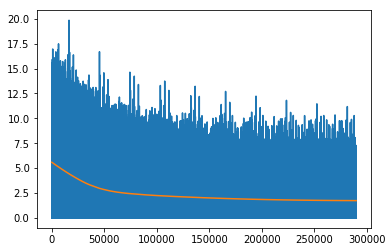

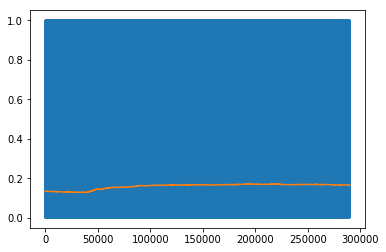

Wall time: 3h 26min 21s


In [39]:
%%time
fit(X_train,y_train,0.000001,10)

In [18]:
int(0.9*X_train.shape[0])

28977

## Batch GD

In [29]:
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    W=np.random.randn(D,K)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    n_batch=10
    bsize=2900
    X_t.shape[0]
    for i in range(epoch):
        for n in range(n_batch):
            x=X_t[(n*bsize):(n*bsize+bsize),:]
            Y=y_t[(n*bsize):(n*bsize+bsize),:]
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            W=W-lr*(x.T.dot(dy))
            b=b-lr*(dy).sum(axis=0)
            c_t.append(cost(Y,y_p_t))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            c_v.append(cost(y_v,y_p_v))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()

Epoch 0 Train Cost: 3.3948215553985506 , Classification: 0.19517241379310346 , Test Cost 3.4350622519817566 , Classification : 0.19440993788819877
Epoch 100 Train Cost: 1.9271873568866291 , Classification: 0.16758620689655174 , Test Cost 1.9269046053866503 , Classification : 0.1813664596273292
Epoch 200 Train Cost: 1.7905869755613018 , Classification: 0.16241379310344828 , Test Cost 1.7776214033460063 , Classification : 0.17236024844720496
Epoch 300 Train Cost: 1.7407021412046222 , Classification: 0.16310344827586207 , Test Cost 1.7276064969098361 , Classification : 0.16987577639751553
Epoch 400 Train Cost: 1.6954415463583026 , Classification: 0.16241379310344828 , Test Cost 1.6821783429378212 , Classification : 0.168944099378882
Epoch 500 Train Cost: 1.6545960133056077 , Classification: 0.16482758620689655 , Test Cost 1.6409542630615692 , Classification : 0.1670807453416149
Epoch 600 Train Cost: 1.617741008694157 , Classification: 0.16517241379310346 , Test Cost 1.6035052446258204 , C

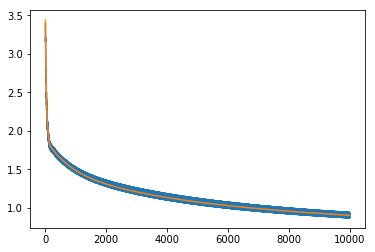

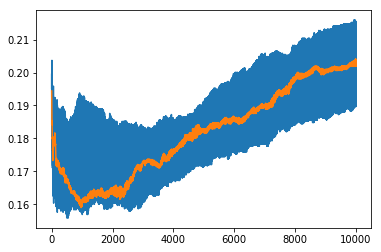

Wall time: 18min 48s


In [33]:
%%time
fit(X_train,y_train,0.000001,1000)

## Full GD with Momentum

### Regular Momentum : 

In [ ]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    W=np.random.randn(D,K)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        W=W-lr*(X_t.T.dot(dy))
        b=b-lr*(dy).sum(axis=0)
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)